In [16]:
# Transfer Learning ile Görüntü Sınıflandırma

# Bu projede Transfer Learning kullanarak görüntü sınıflandırma yapacağız. 
# Bunun için InceptionResNetV2 modelini kullanacağız. 
# Bu model, ImageNet veri seti üzerinde eğitilmiştir. 
# Sınıflandırma yapmak için internette bulduğum bir denizaltı resmi kullanacağız. 
# Bu resim, InceptionResNetV2 modelinin eğitildiği ImageNet veri setinde yer almıyor.

In [17]:
import numpy as np
from PIL import Image
from IPython.display import Image as show_image
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions

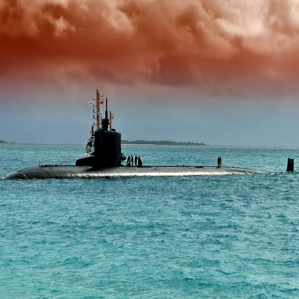

In [18]:

# InceptionResNetV2 önceden eğitilmiş modeli, 299x299 çözünürlükte girişler bekler.  
# InceptionResNetV2 modeli, görüntüleri 1000 olası kategoriden birinde sınıflandıracaktır.

img = Image.open("submarine.jpg").resize((299,299))
img

In [19]:
img = np.array(img) # yapılacak olan işlemler için array formatına dönüştürmeliyiz..

In [20]:
img.shape

(299, 299, 3)

In [27]:
print(img.ndim)

3


In [29]:
# Görüntü verisiyle çalışırken, derin öğrenme modelleri girdiyi belirli bir biçimde bekler. 
# Özellikle, InceptionResNetV2 gibi bir model, her görüntünün 4 boyutlu bir tensör olarak sağlanmasını gerektirir.

# (Adet, Yükseklik, Genişlik, Kanal Sayısı)
# Burada:
# Adet: Kaç adet görüntü olduğunu belirtir (batch size)
# Yükseklik ve Genişlik: Görüntünün boyutu (299x299 piksel)
# Kanal Sayısı: Renkli görüntüler için 3 (RGB kanalları)

# model bu veriyi batch halinde bekler, 
# yani bir seferde birden fazla görüntüyü işleyebilecek şekilde 4 boyutlu olarak verilmelidir

img = img.reshape(-1,299,299,3)

In [31]:
img.shape

(1, 299, 299, 3)

In [33]:
print(img.ndim)

4


In [35]:
# Derin öğrenme modelleriyle çalışırken, giriş verilerini doğru ölçeklendirmek, modelin performansını artırmak için çok önemlidir.

# preprocess_input: Görüntüdeki her pikselin [0, 255] aralığında olan RGB değerlerini, [-1, 1] aralığına ölçekler.
# Piksel değeri 0 → -1’e dönüşür
# Piksel değeri 255 → 1’e dönüşür
# Böylece modelin, giriş verisini beklediği formatla eşleşmesini sağlar.

img = preprocess_input(img)

In [41]:
# img

In [43]:
# modeli oluşturalım..

model = InceptionResNetV2(weights="imagenet", classes=1000)
# mageNet veri setinde önceden eğitilmiş ağırlıklarla yüklüyor ve 
# modeli 1.000 farklı kategori üzerinde tahmin yapacak şekilde yapılandırıyor.


225209952/225209952 ━━━━━━━━━━━━━━━━━━━━ 41s 0us/step


In [45]:
print(model.summary())
print("-----------------------")
print(type(model))

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 55,873,736 (213.14 MB)

 Trainable params: 55,813,192 (212.91 MB)

 Non-trainable params: 60,544 (236.50 KB)

None
-----------------------
<class 'keras.src.models.functional.Functional'>


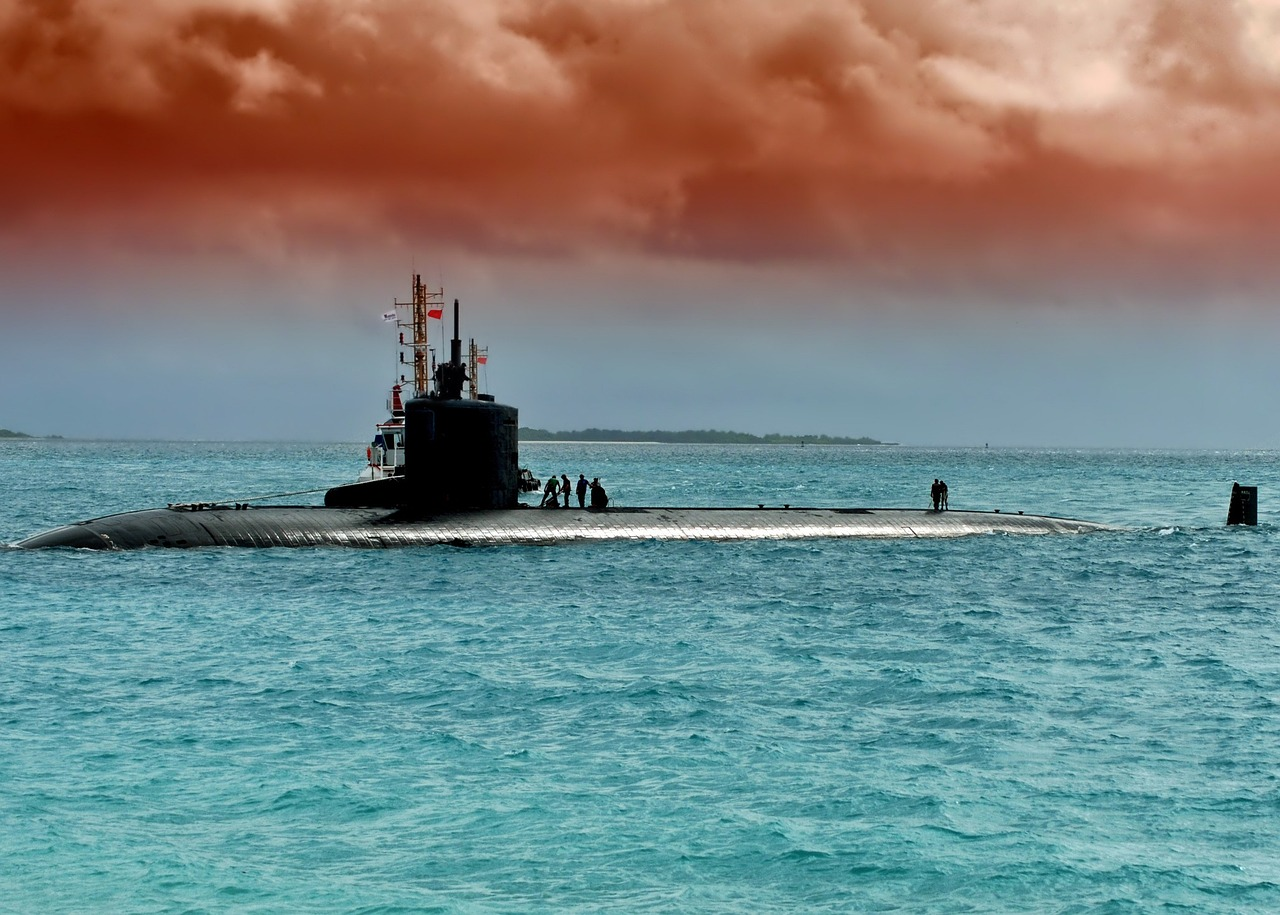

In [47]:
show_image(filename="submarine.jpg")

In [49]:

pred = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [53]:
print("Tahmin edilen sınıflar:", decode_predictions(pred, top=2)[0])

# decode_predictions: Modelin verdiği numerik tahminleri, anlamlı sınıf adlarına dönüştürür.
# top=2: En yüksek olasılığa sahip ilk iki sınıfı döndürür.
# [0]: predict fonksiyonu bir batch içinde işlem yaptığı için sonuç bir liste halinde döner. 
# İlk görüntünün tahminini almak için [0] kullanıyoruz.

# decode_predictions, tahminleri sınıf ID'si yerine doğrudan anlamlı sınıf isimleriyle gösterir. 
# Böylece, kullanıcı modelin sonuçlarını kolayca yorumlayabilir.


Tahmin edilen sınıflar: [('n04347754', 'submarine', 0.9563462), ('n03773504', 'missile', 0.00043367007)]
